In [1]:
import numpy as np
from numpy import arange

import pandas as pd
import seaborn as sns
import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt   
import matplotlib.style

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_auc_score, roc_curve, r2_score

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from mlxtend.evaluate import bias_variance_decomp

import time


In [252]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [253]:
# Read the file and display the first 5 rows
sales= pd.read_excel('innercity.xlsx')
sales.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,1800.0,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,670.0,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,3040.0,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,8.0,1740.0,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,7.0,1120.0,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [254]:
# To display all columns
pd.options.display.max_columns = None

In [255]:
# Display first 5 rows
sales.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,1800.0,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,670.0,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,3040.0,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,8.0,1740.0,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,7.0,1120.0,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [256]:
# Checking the shape of the data: Number of columns and rows
sales.shape

(21613, 23)

In [257]:
# Checking the dataype of all the columns
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [258]:
# Finding basic calculations of all columns
sales.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,sight,quality,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
count,2.161300e+04,2.161300e+04,21505.000000,21505.000000,21596.000000,2.157100e+04,21556.000000,21612.000000,21612.000000,21612.000000,21613.000000,21613.000000,21613.000000,21447.000000,21584.000000,21584.000000
mean,4.580302e+09,5.401822e+05,3.371355,2.115171,2079.860761,1.510458e+04,0.234366,7.656857,1788.366556,291.522534,84.402258,98077.939805,47.560053,1987.065557,12766.543180,0.196720
std,2.876566e+09,3.673622e+05,0.930289,0.770248,918.496121,4.142362e+04,0.766438,1.175484,828.102535,442.580840,401.679240,53.505026,0.138564,685.519629,27286.987107,0.397528
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,1.000000,290.000000,0.000000,0.000000,98001.000000,47.155900,399.000000,651.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,0.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000,47.471000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,47.571800,1840.000000,7620.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068450e+04,0.000000,8.000000,2210.000000,560.000000,0.000000,98118.000000,47.678000,2360.000000,10087.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,6210.000000,871200.000000,1.000000


In [259]:
# Renaming all columns for better understanding
sales.rename(columns = {'yrs_since_sold':'Years_since_txn', 'price':'Price', 'year_sold':'Year_sold', 'sight':'No_of_views', 
                        'room_bed':'Bedrooms', 'room_bath':'Bathrooms', 'ceil':'Floors', 'coast':'Waterfront',
                        'furnished':'Furnished', 'condition':'Condition', 'quality':'Quality', 'total_area':'Total_area', 
                        'living_measure':'Interior_space', 'lot_measure':'Lot_size', 'ceil_measure':'Used_Area', 
                        'basement':'Basement_area', 'living_measure15':'Interior_space_2015', 
                        'lot_measure15':'Lot_size_2015', 'yr_renovated':'Year_renovated', 'lat':'Latitude', 'long':'Longitude',
                        'zipcode':'Zipcode'}, inplace = True)

In [260]:
sales.head(15)

,cid,dayhours,Price,Bedrooms,Bathrooms,Interior_space,Lot_size,Floors,Waterfront,No_of_views,Condition,Quality,Used_Area,Basement_area,yr_built,Year_renovated,Zipcode,Latitude,Longitude,Interior_space_2015,Lot_size_2015,Furnished,Total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,1800.0,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,670.0,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,3040.0,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,8.0,1740.0,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,7.0,1120.0,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710
5,8016250080,20140709T000000,245000,3.0,2.50,1610.0,7223.0,2,0,0.0,3,7.0,1610.0,0.0,1994,0,98030,47.3661,$,1610.0,7162.0,0.0,8833
6,510002519,20140715T000000,466000,2.0,1.50,1140.0,1058.0,3,0,0.0,3,7.0,1140.0,0.0,2005,0,98103,47.6608,-122.333,1170.0,1116.0,0.0,2198
7,1624059224,20140618T000000,1160000,4.0,3.50,4680.0,9700.0,2,0,0.0,3,10.0,3360.0,1320.0,2005,0,98006,47.5703,-122.165,2800.0,12343.0,1.0,14380
8,5469503280,20140721T000000,449950,4.0,2.50,3100.0,10000.0,2,0,0.0,3,9.0,3100.0,0.0,1978,0,98042,47.3741,-122.15,1850.0,9438.0,1.0,13100
9,2787460430,20141028T000000,299950,2.0,1.75,1460.0,10506.0,1,0,0.0,3,7.0,1460.0,0.0,1983,0,98031,47.4048,-122.178,1460.0,8153.0,0.0,11966


In [261]:
# We drop unnecesary columns
sales.drop(['cid', 'Total_area', 'Interior_space_2015', 'Lot_size_2015'], axis=1, inplace=True)

In [262]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dayhours        21613 non-null  object 
 1   Price           21613 non-null  int64  
 2   Bedrooms        21505 non-null  float64
 3   Bathrooms       21505 non-null  float64
 4   Interior_space  21596 non-null  float64
 5   Lot_size        21571 non-null  float64
 6   Floors          21571 non-null  object 
 7   Waterfront      21612 non-null  object 
 8   No_of_views     21556 non-null  float64
 9   Condition       21556 non-null  object 
 10  Quality         21612 non-null  float64
 11  Used_Area       21612 non-null  float64
 12  Basement_area   21612 non-null  float64
 13  yr_built        21612 non-null  object 
 14  Year_renovated  21613 non-null  int64  
 15  Zipcode         21613 non-null  int64  
 16  Latitude        21613 non-null  float64
 17  Longitude       21613 non-null 

### Outlier Treatment
We perform for the following continous variables.
- Price
- Interior Space
- Lot Size
- Used Area
- Basement Area

In [263]:
#We perform IQR 1.5 outlier treatment for Price

def outliers(sales, feature):
    Q1= sales[feature].quantile(0.25)
    Q3 = sales[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(sales, "Price")
#print("Upper whisker: ", upper)
#print("Lower Whisker: ", lower)

sales = sales[(sales['Price'] > lower) & (sales['Price'] < upper)]

In [264]:
#We perform IQR 1.5 outlier treatment for no of Interior Space

def outliers(sales, feature):
    Q1= sales[feature].quantile(0.25)
    Q3 = sales[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(sales, "Interior_space")
#print("Upper whisker: ", upper)
#print("Lower Whisker: ", lower)

sales = sales[(sales['Interior_space'] > lower) & (sales['Interior_space'] < upper)]

In [265]:
#We perform IQR 1.5 outlier treatment for no of Lot Sizes

def outliers(sales, feature):
    Q1= sales[feature].quantile(0.25)
    Q3 = sales[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(sales, "Lot_size")
#print("Upper whisker: ", upper)
#print("Lower Whisker: ", lower)

sales = sales[(sales['Lot_size'] > lower) & (sales['Lot_size'] < upper)]

In [266]:
#We perform IQR 1.5 outlier treatment for no of Used Area

def outliers(sales, feature):
    Q1= sales[feature].quantile(0.25)
    Q3 = sales[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(sales, "Used_Area")
#print("Upper whisker: ", upper)
#print("Lower Whisker: ", lower)

sales = sales[(sales['Used_Area'] > lower) & (sales['Used_Area'] < upper)]

In [267]:
#We perform IQR 1.5 outlier treatment for Basement Area

def outliers(sales, feature):
    Q1= sales[feature].quantile(0.25)
    Q3 = sales[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(sales, "Basement_area")
#print("Upper whisker: ", upper)
#print("Lower Whisker: ", lower)

sales = sales[(sales['Basement_area'] > lower) & (sales['Basement_area'] < upper)]

In [268]:
#Removing row containing 33 bedrooms

sales.drop(sales.index[sales['Bedrooms'] == 33], inplace=True)

In [269]:
sales.describe()

,Price,Bedrooms,Bathrooms,Interior_space,Lot_size,No_of_views,Quality,Used_Area,Basement_area,Year_renovated,Zipcode,Latitude,Furnished
count,1.718500e+04,17107.000000,17107.000000,17185.000000,17185.000000,17139.000000,17185.000000,17185.000000,17185.000000,17185.000000,17185.000000,17185.000000,17162.000000
mean,4.512978e+05,3.257555,1.980052,1819.730230,7061.218854,0.137464,7.392144,1577.246145,242.484085,71.526157,98082.240733,47.559541,0.108146
std,1.926912e+05,0.858286,0.675977,624.155719,3386.421859,0.563099,0.911414,589.843626,358.642739,370.980391,53.977281,0.139021,0.310574
min,7.800000e+04,0.000000,0.000000,370.000000,520.000000,0.000000,3.000000,370.000000,0.000000,0.000000,98001.000000,47.155900,0.000000
25%,3.025000e+05,3.000000,1.500000,1340.000000,4725.000000,0.000000,7.000000,1130.000000,0.000000,0.000000,98034.000000,47.469800,0.000000
50%,4.150000e+05,3.000000,2.000000,1760.000000,7030.000000,0.000000,7.000000,1440.000000,0.000000,0.000000,98074.000000,47.569100,0.000000
75%,5.650000e+05,4.000000,2.500000,2240.000000,9022.000000,0.000000,8.000000,1920.000000,500.000000,0.000000,98119.000000,47.680400,0.000000
max,1.120000e+06,11.000000,5.250000,3970.000000,17986.000000,4.000000,11.000000,3223.000000,1290.000000,2015.000000,98199.000000,47.777600,1.000000


### Null Value Treatment

In [270]:
# Examine missing values
sales_na = sales.isna().sum()

# Find out all variables that contain missing values
sales_na[sales_na.values > 0].sort_values(ascending=False)

Bedrooms       78
Bathrooms      78
No_of_views    46
Condition      46
Furnished      23
dtype: int64

In [271]:
# Due to the low amount of null values, we drop all the rows containing null values
sales = sales.dropna(axis=0, subset=['Bedrooms', 'Bathrooms', 'No_of_views', 'Condition', 'Furnished'])

In [272]:
#Check for null values
sales_na = sales.isna().sum()
sales_na[sales_na.values > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [273]:
# extracting useful information from dayhour column
sales['Year_sold'] = sales['dayhours'].str[:4]
sales['Year_sold'] = sales['Year_sold'].astype(int)
sales['Years_since_txn'] = 2022 - sales['Year_sold']

sales['Date_sold'] = sales['dayhours'].str[:8]
sales['Date_sold'] = sales['Date_sold'].astype(int)

sales['Month_sold'] = sales['dayhours'].str[4:6]
sales['Month_sold'] = sales['Month_sold'].astype(int)

sales['Day_sold'] = sales['dayhours'].str[6:8]
sales['Day_sold'] = sales['Day_sold'].astype(int)

In [274]:
# extracting useful information from yr_built column
sales['Age'] = 2022 - sales['yr_built']

In [275]:
#sort by date sold & reorder
sales = sales.sort_values(['Date_sold'])
sales = sales[["Date_sold", "Month_sold", "Day_sold", "Year_sold", "Years_since_txn", "Price", "Bedrooms", "Bathrooms", 
               "No_of_views",  "Floors", "Interior_space", "Lot_size", "Used_Area", "Basement_area", "Waterfront", 
               "Age", "Furnished", "Condition", "Quality", "Year_renovated", "Latitude", "Longitude", "Zipcode"]]

In [276]:
sales.head()

,Date_sold,Month_sold,Day_sold,Year_sold,Years_since_txn,Price,Bedrooms,Bathrooms,No_of_views,Floors,Interior_space,Lot_size,Used_Area,Basement_area,Waterfront,Age,Furnished,Condition,Quality,Year_renovated,Latitude,Longitude,Zipcode
715,20140502,5,2,2014,8,335000,2.0,2.0,0.0,1,1350.0,2560.0,1350.0,0.0,0,46,0.0,3,8.0,0,47.6344,-122.107,98052
12679,20140502,5,2,2014,8,285000,3.0,2.5,0.0,1,2090.0,10834.0,1360.0,730.0,0,35,0.0,4,8.0,0,47.3537,-122.303,98003
14549,20140502,5,2,2014,8,407500,3.0,2.5,0.0,2,1930.0,10460.0,1930.0,0.0,0,26,0.0,3,8.0,0,47.4938,-122.161,98059
14703,20140502,5,2,2014,8,313000,3.0,1.5,0.0,1.5,1340.0,7912.0,1340.0,0.0,0,67,0.0,3,7.0,0,47.7658,-122.339,98133
14062,20140502,5,2,2014,8,790000,3.0,2.5,0.0,1,2600.0,4750.0,1700.0,900.0,0,71,1.0,4,9.0,0,47.6833,-122.4,98117


In [277]:
#Variable Transformation

sales['No_of_views'] = sales['No_of_views'].astype(int)
sales['Furnished'] = sales['Furnished'].astype(int)
sales['Interior_space'] = sales['Interior_space'].astype(int)
sales['Lot_size'] = sales['Lot_size'].astype(int)
sales['Used_Area'] = sales['Used_Area'].astype(int)
sales['Basement_area'] = sales['Basement_area'].astype(int)
sales['Furnished'] = sales['Furnished'].astype(int)
sales['Quality'] = sales['Quality'].astype(int)
sales['Age'] = sales['Age'].astype(int)

In [278]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17047 entries, 715 to 651
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date_sold        17047 non-null  int32  
 1   Month_sold       17047 non-null  int32  
 2   Day_sold         17047 non-null  int32  
 3   Year_sold        17047 non-null  int32  
 4   Years_since_txn  17047 non-null  int32  
 5   Price            17047 non-null  int64  
 6   Bedrooms         17047 non-null  float64
 7   Bathrooms        17047 non-null  float64
 8   No_of_views      17047 non-null  int32  
 9   Floors           17047 non-null  object 
 10  Interior_space   17047 non-null  int32  
 11  Lot_size         17047 non-null  int32  
 12  Used_Area        17047 non-null  int32  
 13  Basement_area    17047 non-null  int32  
 14  Waterfront       17047 non-null  object 
 15  Age              17047 non-null  int32  
 16  Furnished        17047 non-null  int32  
 17  Condition   

In [279]:
#We now convert the object variables into numerical or categorical

In [280]:
sales['Waterfront'].unique()

array([0, 1, '$'], dtype=object)

In [281]:
sales["Waterfront"] = sales["Waterfront"].astype(str)
sales["Waterfront"] = sales["Waterfront"].apply(lambda x: x.replace("$", "5"))
sales = sales[sales.Waterfront != "5"]
sales["Waterfront"] = sales["Waterfront"].astype('category')

In [282]:
sales["No_of_views"] = sales["No_of_views"].astype('int')

In [283]:
sales['Furnished'].unique()

array([0, 1])

In [284]:
sales['Furnished'] = sales['Furnished'].astype('category')

In [285]:
# Checking unique values in long
sales['Longitude'].unique()

array([-122.107, -122.303, -122.161, -122.339, -122.4, -122.365, -121.897,
       -121.734, -121.787, -122.306, -122.325, -122.153, -122.046,
       -122.114, -122.191, -122.384, -122.158, -122.201, -122.313,
       -122.205, -122.269, -122.363, -122.292, -122.134, -122.177,
       -122.133, -122.322, -122.055, -122.408, -122.222, -122.193,
       -122.181, -122.342, -122.383, -122.36, -122.34, -122.397, -122.328,
       -122.392, -122.321, -122.281, -122.072, -122.135, -122.295,
       -122.364, -122.151, -122.017, -122.144, -122.395, -121.763,
       -122.216, -122.289, -122.026, -122.19, -122.113, -122.31, -122.399,
       -122.338, -122.284, -122.093, -122.173, -122.115, -122.013,
       -122.324, -122.119, -122.347, -122.035, -122.17, -122.027,
       -122.261, -122.371, -122.352, -122.294, -122.297, -122.267,
       -122.391, -122.287, -122.39, -122.126, -121.976, -121.993,
       -122.087, -122.309, -122.182, -122.094, -122.195, -122.24,
       -121.887, -122.341, -122.227, -122

In [286]:
# Removing wrong values
sales["Longitude"] = sales["Longitude"].astype(str)
sales["Longitude"] = sales["Longitude"].apply(lambda x: x.replace("$", "0"))
sales["Longitude"] = sales["Longitude"].apply(lambda x: x.replace("-", ""))
sales["Longitude"] = sales["Longitude"].astype(float)
sales = sales[sales.Longitude != 0]

In [287]:
# checking unique values for condition
sales['Condition'].unique()

array([3, 4, 5, 2, 1], dtype=object)

In [288]:
sales["Condition"] = sales["Condition"].astype(int)

In [289]:
#checking unique values for ceil
sales['Floors'].unique()

array([1, 2, 1.5, 3, 2.5, 3.5], dtype=object)

In [290]:
sales['Floors'] = sales['Floors'].astype(str)
sales['Floors'] = sales['Floors'].apply(lambda x: x.replace("$", "0"))
sales['Floors'] = sales['Floors'].astype(float)
sales = sales[sales.Floors != 0]

In [291]:
#checking unique values for yr_built
sales['Age'].unique()
sales["Age"] = sales["Age"].astype(int)

In [ ]:
sales['Waterfront'] = sales['Waterfront'].astype(int)
sales['Furnished'] = sales['Furnished'].astype(int)

In [292]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16999 entries, 715 to 651
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Date_sold        16999 non-null  int32   
 1   Month_sold       16999 non-null  int32   
 2   Day_sold         16999 non-null  int32   
 3   Year_sold        16999 non-null  int32   
 4   Years_since_txn  16999 non-null  int32   
 5   Price            16999 non-null  int64   
 6   Bedrooms         16999 non-null  float64 
 7   Bathrooms        16999 non-null  float64 
 8   No_of_views      16999 non-null  int32   
 9   Floors           16999 non-null  float64 
 10  Interior_space   16999 non-null  int32   
 11  Lot_size         16999 non-null  int32   
 12  Used_Area        16999 non-null  int32   
 13  Basement_area    16999 non-null  int32   
 14  Waterfront       16999 non-null  category
 15  Age              16999 non-null  int32   
 16  Furnished        16999 non-null  categor

In [293]:
room_category = pd.cut(sales.Bedrooms,bins=[0,2,4,34],labels=['1/2 BHK','3/4 BHK','4+ BHK'])
sales.insert(6,'Bedroom', room_category)

In [294]:
room_category = pd.cut(sales.Bathrooms,bins=[0,1.5,2.5,5.5],labels=['<=1.5 Bath','1.5-2.5 Bath','2.5+ Bath'])
sales.insert(8,'Bathroom', room_category)

In [295]:
sales.head(5)

,Date_sold,Month_sold,Day_sold,Year_sold,Years_since_txn,Price,Bedroom,Bedrooms,Bathroom,Bathrooms,No_of_views,Floors,Interior_space,Lot_size,Used_Area,Basement_area,Waterfront,Age,Furnished,Condition,Quality,Year_renovated,Latitude,Longitude,Zipcode
715,20140502,5,2,2014,8,335000,1/2 BHK,2.0,1.5-2.5 Bath,2.0,0,1.0,1350,2560,1350,0,0,46,0,3,8,0,47.6344,122.107,98052
12679,20140502,5,2,2014,8,285000,3/4 BHK,3.0,1.5-2.5 Bath,2.5,0,1.0,2090,10834,1360,730,0,35,0,4,8,0,47.3537,122.303,98003
14549,20140502,5,2,2014,8,407500,3/4 BHK,3.0,1.5-2.5 Bath,2.5,0,2.0,1930,10460,1930,0,0,26,0,3,8,0,47.4938,122.161,98059
14703,20140502,5,2,2014,8,313000,3/4 BHK,3.0,<=1.5 Bath,1.5,0,1.5,1340,7912,1340,0,0,67,0,3,7,0,47.7658,122.339,98133
14062,20140502,5,2,2014,8,790000,3/4 BHK,3.0,1.5-2.5 Bath,2.5,0,1.0,2600,4750,1700,900,0,71,1,4,9,0,47.6833,122.400,98117


In [296]:
sales.describe()

,Date_sold,Month_sold,Day_sold,Year_sold,Years_since_txn,Price,Bedrooms,Bathrooms,No_of_views,Floors,Interior_space,Lot_size,Used_Area,Basement_area,Age,Condition,Quality,Year_renovated,Latitude,Longitude,Zipcode
count,1.699900e+04,16999.000000,16999.000000,16999.000000,16999.000000,1.699900e+04,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000,16999.000000
mean,2.014394e+07,6.565269,15.717748,2014.326313,7.673687,4.509784e+05,3.256074,1.979102,0.137655,1.465851,1819.381964,7063.492735,1577.309842,242.072122,52.759398,3.412730,7.392141,71.014530,47.559326,122.231192,98082.186423
std,4.447557e+03,3.123769,8.608238,0.468877,0.468877,1.925624e+05,0.856936,0.675405,0.563525,0.544438,623.899127,3386.400887,590.016631,358.717984,30.005528,0.651114,0.912194,369.692467,0.139162,0.132424,53.987130
min,2.014050e+07,1.000000,1.000000,2014.000000,7.000000,7.800000e+04,0.000000,0.000000,0.000000,1.000000,370.000000,520.000000,370.000000,0.000000,7.000000,1.000000,3.000000,0.000000,47.155900,121.315000,98001.000000
25%,2.014072e+07,4.000000,8.000000,2014.000000,7.000000,3.020000e+05,3.000000,1.500000,0.000000,1.000000,1340.000000,4725.000000,1130.000000,0.000000,26.000000,3.000000,7.000000,0.000000,47.469300,122.155000,98034.000000
50%,2.014102e+07,6.000000,16.000000,2014.000000,8.000000,4.150000e+05,3.000000,2.000000,0.000000,1.000000,1760.000000,7043.000000,1440.000000,0.000000,52.000000,3.000000,7.000000,0.000000,47.568900,122.272000,98074.000000
75%,2.015022e+07,9.000000,23.000000,2015.000000,8.000000,5.640000e+05,4.000000,2.500000,0.000000,2.000000,2240.000000,9020.500000,1920.000000,500.000000,73.000000,4.000000,8.000000,0.000000,47.680400,122.338000,98119.000000
max,2.015052e+07,12.000000,31.000000,2015.000000,8.000000,1.120000e+06,11.000000,5.250000,4.000000,3.500000,3970.000000,17986.000000,3223.000000,1290.000000,122.000000,5.000000,11.000000,2015.000000,47.777600,122.512000,98199.000000


### Univariate analysis

In [297]:
# Let's look at the distribution of price at different percentiles
print("0.5% properties have a price lower than {0: .0f}".format(np.percentile(sales["Price"], 0.5)))
print("  1% properties have a price lower than {0: .0f}".format(np.percentile(sales["Price"], 1)))
print("  5% properties have a price lower than {0: .0f}".format(np.percentile(sales["Price"], 5)))
print(" 10% properties have a price lower than {0: .0f}".format(np.percentile(sales["Price"], 10)))
print(" 90% properties have a price lower than {0: .0f}".format(np.percentile(sales["Price"], 90)))
print(" 95% properties have a price lower than {0: .0f}".format(np.percentile(sales["Price"], 95)))
print(" 99% properties have a price lower than {0: .0f}".format(np.percentile(sales["Price"], 99)))
print("99.5% properties have a price lower than {0: .0f}".format(np.percentile(sales["Price"], 99.5)))

0.5% properties have a price lower than  130000
  1% properties have a price lower than  150000
  5% properties have a price lower than  205000
 10% properties have a price lower than  236000
 90% properties have a price lower than  726000
 95% properties have a price lower than  825000
 99% properties have a price lower than  1000000
99.5% properties have a price lower than  1050000


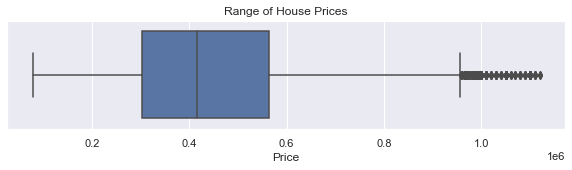

In [298]:
f, ax = plt.subplots(figsize=(10, 2))
ax = sns.boxplot(x=sales["Price"]).set(title='Range of House Prices')

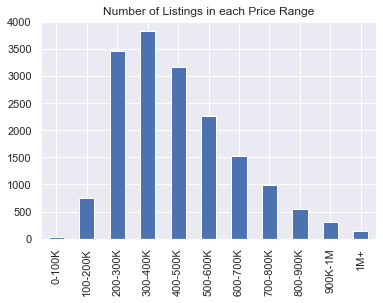

In [299]:
## Let's create a range variable to understand how many records we have in different slabs

Price_range = pd.cut(sales["Price"], 
                     bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, sales["Price"].max()], 
                     labels=["0-100K", "100-200K", "200-300K", "300-400K", "400-500K", "500-600K", "600-700K", "700-800K", "800-900K", "900K-1M", "1M+"])
sales["Price_range"] = Price_range 
sales["Price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range")
plt.show()

[Text(0.5, 1.0, 'Distribution of House Prices')]

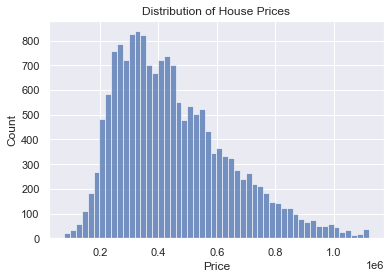

In [300]:
sns.histplot(sales['Price']).set(title='Distribution of House Prices')

[Text(0.5, 1.0, 'Distribution of House Prices')]

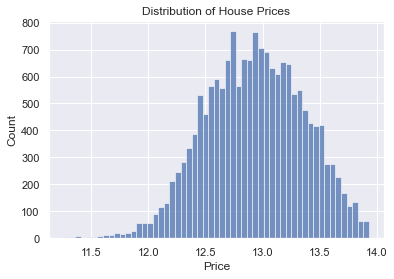

In [301]:
sns.histplot(np.log(sales['Price'])).set(title='Distribution of House Prices')

Log transformation of the price variable looks to be slightly more symmetrically distributed. We can use a log of the price variable as our target variable in the regression model, to check if performance is better than the price feature used without any transformation

In [302]:
## This is a custom column that we created to visualize the Price variable in discrete format.

sales.drop(['Price_range'], axis='columns', inplace=True)

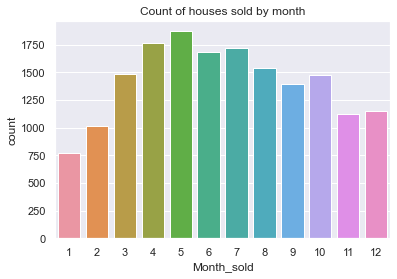

In [303]:
ax = sns.countplot(x="Month_sold", data=sales).set(title='Count of houses sold by month')

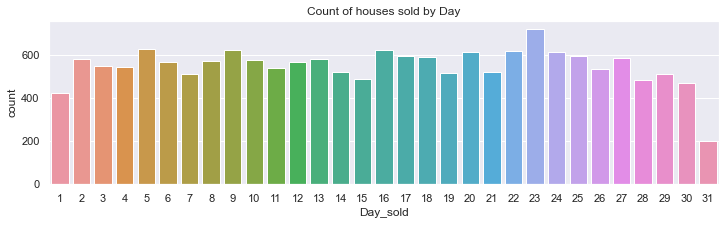

In [304]:
f, ax = plt.subplots(figsize=(12, 3))
ax = sns.countplot(x="Day_sold", data=sales).set(title='Count of houses sold by Day')

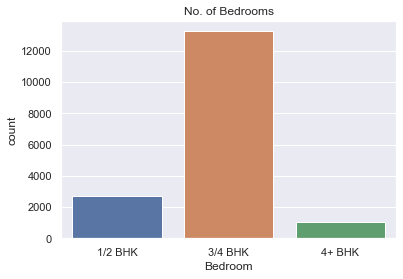

In [305]:
ax = sns.countplot(x="Bedroom", data=sales).set(title='No. of Bedrooms')

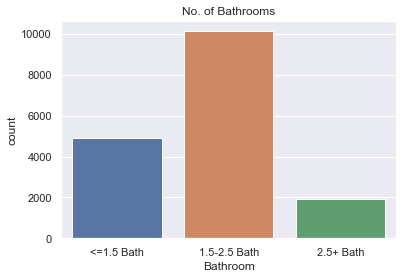

In [306]:
ax = sns.countplot(x="Bathroom", data=sales).set(title='No. of Bathrooms')

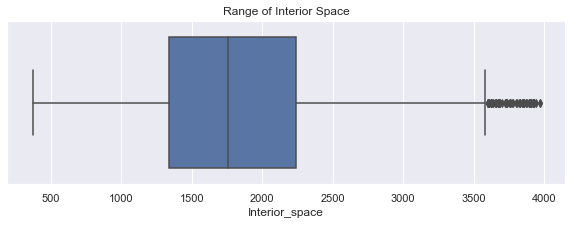

In [307]:
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.boxplot(x=sales["Interior_space"]).set(title='Range of Interior Space')

[Text(0.5, 1.0, 'Distribution of Interior Space')]

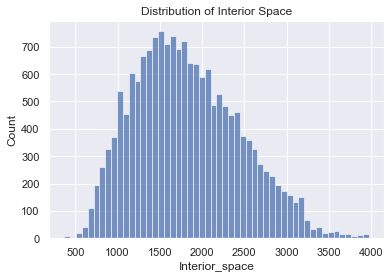

In [308]:
sns.histplot(sales['Interior_space']).set(title='Distribution of Interior Space')

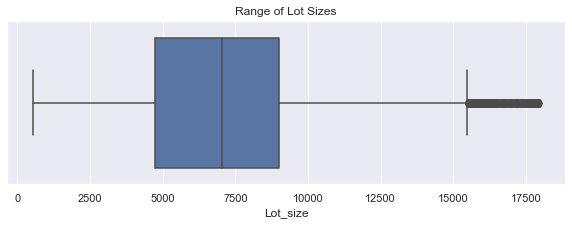

In [309]:
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.boxplot(x=sales["Lot_size"]).set(title='Range of Lot Sizes')

[Text(0.5, 1.0, 'Distribution of Lot Sizes')]

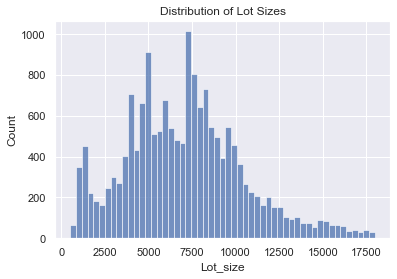

In [310]:
sns.histplot(sales['Lot_size']).set(title='Distribution of Lot Sizes')

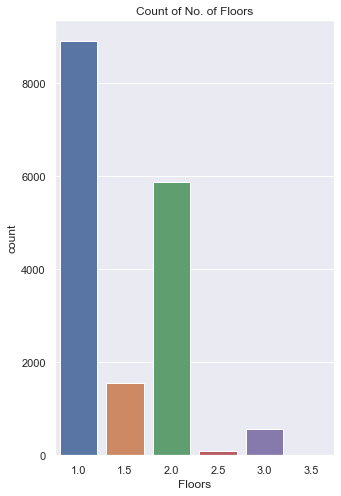

In [311]:
f, ax = plt.subplots(figsize=(5, 8))
ax = sns.countplot(x="Floors", data=sales).set(title='Count of No. of Floors')

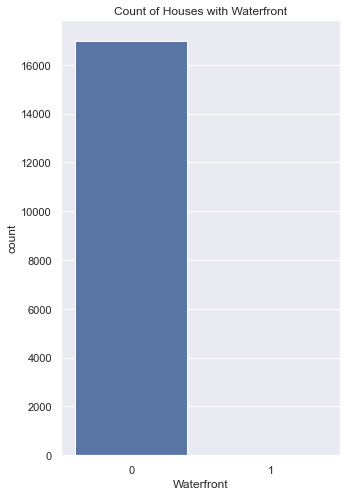

In [312]:
f, ax = plt.subplots(figsize=(5, 8))
ax = sns.countplot(x="Waterfront", data=sales).set(title='Count of Houses with Waterfront')

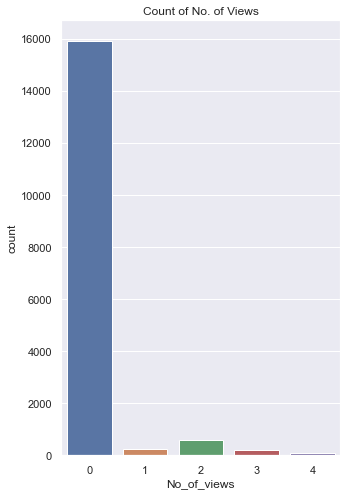

In [313]:
#sales['sight'].value_counts()
f, ax = plt.subplots(figsize=(5, 8))
ax = sns.countplot(x="No_of_views", data=sales).set(title='Count of No. of Views')

In [314]:
#Due to almost 16000 houses with no veiws in a lot of 17000 txn, we drop the column
sales.drop(['No_of_views'], axis=1, inplace=True)

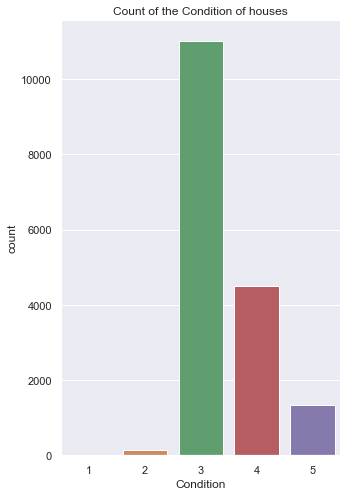

In [315]:
f, ax = plt.subplots(figsize=(5, 8))
ax = sns.countplot(x="Condition", data=sales).set(title='Count of the Condition of houses')

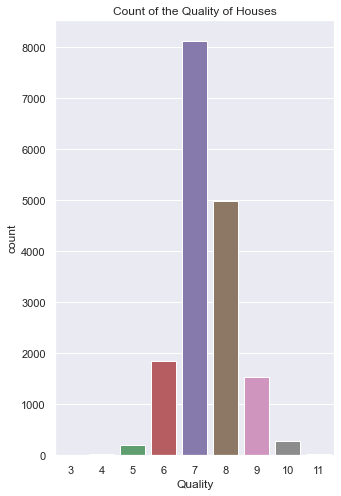

In [316]:
f, ax = plt.subplots(figsize=(5, 8))
ax = sns.countplot(x="Quality", data=sales).set(title='Count of the Quality of Houses')

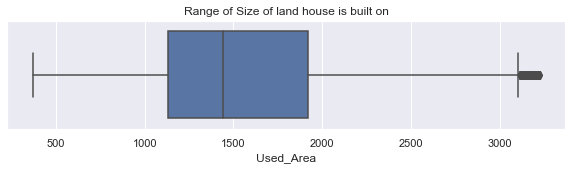

In [317]:
f, ax = plt.subplots(figsize=(10, 2))
ax = sns.boxplot(x=sales["Used_Area"]).set(title='Range of Size of land house is built on')

[Text(0.5, 1.0, 'Distribution of Size of land house is built on')]

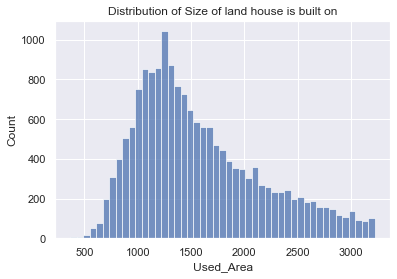

In [318]:
sns.histplot(sales['Used_Area']).set(title='Distribution of Size of land house is built on')

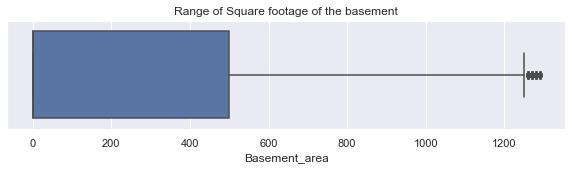

In [319]:
f, ax = plt.subplots(figsize=(10, 2))
ax = sns.boxplot(x=sales["Basement_area"]).set(title='Range of Square footage of the basement')

[Text(0.5, 1.0, 'Distribution of Square footage of the basement')]

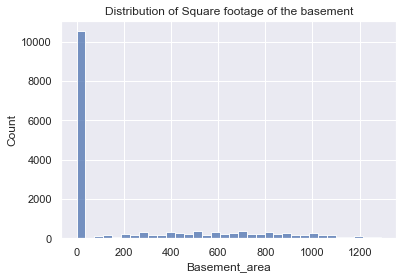

In [320]:
sns.histplot(sales['Basement_area']).set(title='Distribution of Square footage of the basement')

[Text(0.5, 1.0, 'Count of the Houses by Age')]

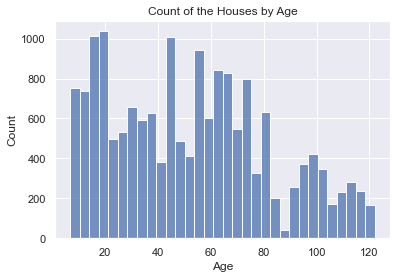

In [321]:
sns.histplot(sales['Age']).set(title='Count of the Houses by Age')
#ax = sns.countplot(x="yr_built", data=sales)

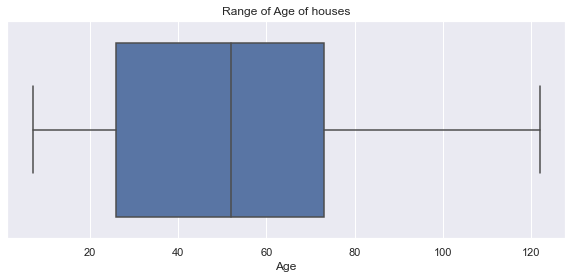

In [322]:
f, ax = plt.subplots(figsize=(10, 4))
ax = sns.boxplot(x=sales["Age"]).set(title='Range of Age of houses')

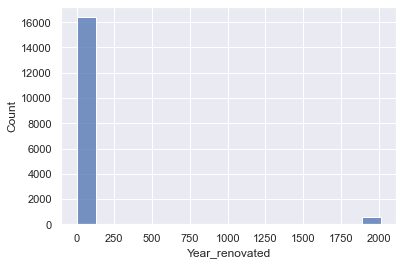

In [323]:
sns.histplot(sales['Year_renovated']);
#ax = sns.countplot(x="yr_renovated", data=sales)

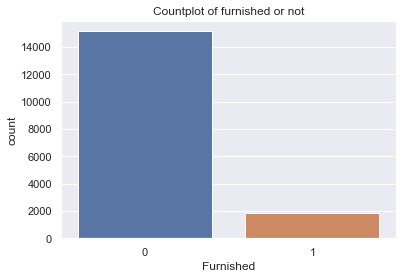

In [324]:
ax = sns.countplot(x="Furnished", data=sales).set(title='Countplot of furnished or not')

In [325]:
sales['Bedroom'] = sales['Bedroom'].replace(['1/2 BHK','3/4 BHK','4+ BHK'],[1, 2, 3])
sales['Bathroom'] = sales['Bathroom'].replace(['<=1.5 Bath','1.5-2.5 Bath','2.5+ Bath'],[1, 2, 3])

In [326]:
#Check for null values
sales_na = sales.isna().sum()
sales_na[sales_na.values > 0].sort_values(ascending=False)

Bedroom     10
Bathroom     5
dtype: int64

In [327]:
# Due to the low amount of null values, we drop all the rows containing null values
sales = sales.dropna(axis=0, subset=['Bedroom', 'Bathroom'])

In [340]:
sales['Bedroom'] = sales['Bedroom'].astype(int)
sales['Bathroom'] = sales['Bathroom'].astype(int)

In [329]:
sales.describe()

,Date_sold,Month_sold,Day_sold,Year_sold,Years_since_txn,Price,Bedroom,Bedrooms,Bathroom,Bathrooms,Floors,Interior_space,Lot_size,Used_Area,Basement_area,Age,Condition,Quality,Year_renovated,Latitude,Longitude,Zipcode
count,1.698900e+04,16989.000000,16989.000000,16989.000000,16989.000000,1.698900e+04,16989.000000,16989.000000,16989.000000,16989.000000,16989.000000,16989.000000,16989.000000,16989.000000,16989.000000,16989.000000,16989.000000,16989.000000,16989.000000,16989.000000,16989.000000,16989.000000
mean,2.014393e+07,6.565130,15.718229,2014.326270,7.673730,4.510305e+05,1.904821,3.257990,1.824946,1.979678,1.465448,1819.468833,7064.618459,1577.254223,242.214609,52.767732,3.412973,7.392372,71.056331,47.559359,122.231240,98082.192419
std,4.447432e+03,3.123519,8.608168,0.468861,0.468861,1.925076e+05,0.459131,0.853538,0.610490,0.674663,0.544019,623.814800,3386.611736,589.913356,358.775451,30.005024,0.651138,0.912025,369.797244,0.139150,0.132374,53.992410
min,2.014050e+07,1.000000,1.000000,2014.000000,7.000000,7.800000e+04,1.000000,1.000000,1.000000,0.500000,1.000000,370.000000,520.000000,370.000000,0.000000,7.000000,1.000000,3.000000,0.000000,47.155900,121.315000,98001.000000
25%,2.014072e+07,4.000000,8.000000,2014.000000,7.000000,3.020000e+05,2.000000,3.000000,1.000000,1.500000,1.000000,1340.000000,4725.000000,1130.000000,0.000000,26.000000,3.000000,7.000000,0.000000,47.469400,122.155000,98034.000000
50%,2.014102e+07,6.000000,16.000000,2014.000000,8.000000,4.150000e+05,2.000000,3.000000,2.000000,2.000000,1.000000,1760.000000,7047.000000,1440.000000,0.000000,52.000000,3.000000,7.000000,0.000000,47.569000,122.272000,98074.000000
75%,2.015022e+07,9.000000,23.000000,2015.000000,8.000000,5.640000e+05,2.000000,4.000000,2.000000,2.500000,2.000000,2240.000000,9023.000000,1920.000000,500.000000,73.000000,4.000000,8.000000,0.000000,47.680400,122.338000,98119.000000
max,2.015052e+07,12.000000,31.000000,2015.000000,8.000000,1.120000e+06,3.000000,11.000000,3.000000,5.250000,3.500000,3970.000000,17986.000000,3223.000000,1290.000000,122.000000,5.000000,11.000000,2015.000000,47.777600,122.512000,98199.000000


In [338]:
sales.drop(['Bedrooms', 'Bathrooms', 'Latitude', 'Longitude'], axis=1, inplace=True)

We check correlation with continous

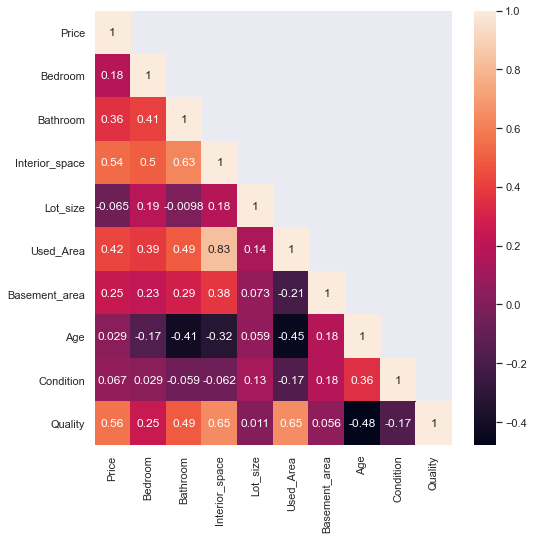

In [332]:
#heatmap
#ax = sns.heatmap(sales)
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(sales[['Price', 'Bedroom','Bathroom', 'Interior_space', 'Lot_size', 'Used_Area', 'Basement_area', 'Age', 'Condition', 'Quality']].corr(),
            annot=True,mask=np.triu(sales[['Price','Bedroom','Bathroom', 'Interior_space', 'Lot_size', 'Used_Area', 'Basement_area', 'Age', 'Condition', 'Quality']].corr(),+1));

#### In order to compare variables with high significance to target variable, we compare variables with correlation to price(target variable) higher than 0.4 or lower than -0.4. 
#### They are:
- Interior Space
- Used Area
- Quality

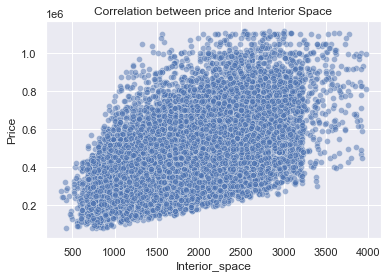

In [333]:
#Price vs Interior Space scattter

sns.scatterplot(x="Interior_space", y="Price", data=sales, alpha=0.5)
plt.title("Correlation between price and Interior Space")
plt.show()

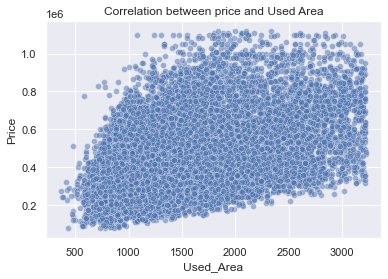

In [334]:
#Price vs Used Area scatter

sns.scatterplot(x="Used_Area", y="Price", data=sales, alpha=0.5)
plt.title("Correlation between price and Used Area")
plt.show()

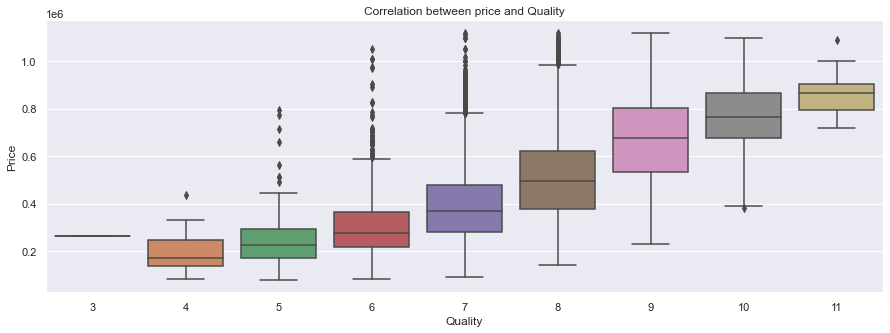

In [336]:
#Price vs Quality boxplot

f, ax = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(x="Quality", y="Price", data=sales)

plt.title("Correlation between price and Quality")
plt.show()

In [342]:
#sales.info()
sales.shape

(16989, 20)

#### Categorical variables
- Month sold
- Day sold
- Bedrooms
- Bathrooms
- Floors
- Waterfront
- Furnished



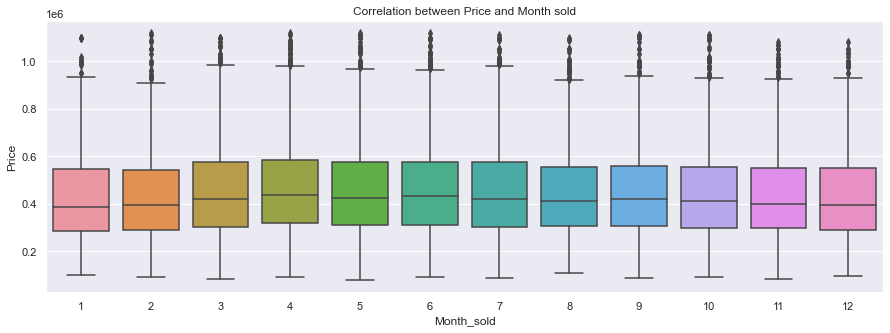

In [343]:
#Price vs Month_sold boxplot

f, ax = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(x="Month_sold", y="Price", data=sales)

plt.title("Correlation between Price and Month sold")
plt.show()

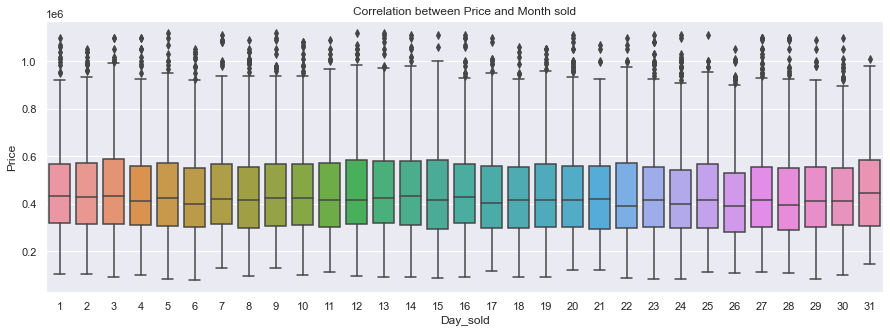

In [344]:
#Price vs Day_sold boxplot

f, ax = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(x="Day_sold", y="Price", data=sales)

plt.title("Correlation between Price and Month sold")
plt.show()

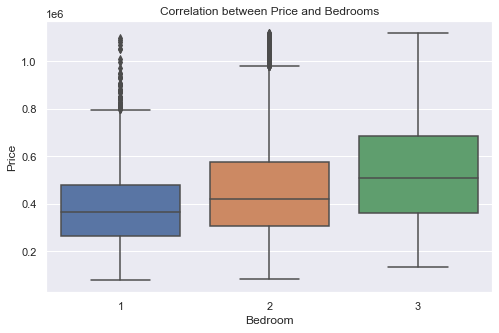

In [349]:
#Price vs Bedrooms boxplot

f, ax = plt.subplots(figsize=(8, 5))
ax = sns.boxplot(x="Bedroom", y="Price", data=sales)

plt.title("Correlation between Price and Bedrooms")
plt.show()

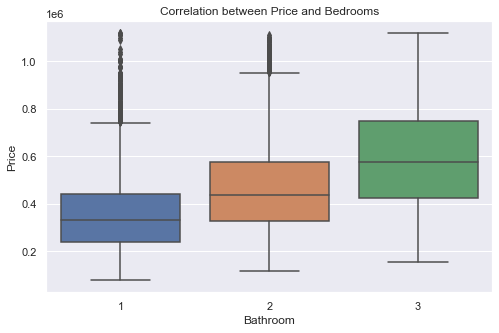

In [350]:
#Price vs Bathrooms boxplot

f, ax = plt.subplots(figsize=(8, 5))
ax = sns.boxplot(x="Bathroom", y="Price", data=sales)

plt.title("Correlation between Price and Bedrooms")
plt.show()

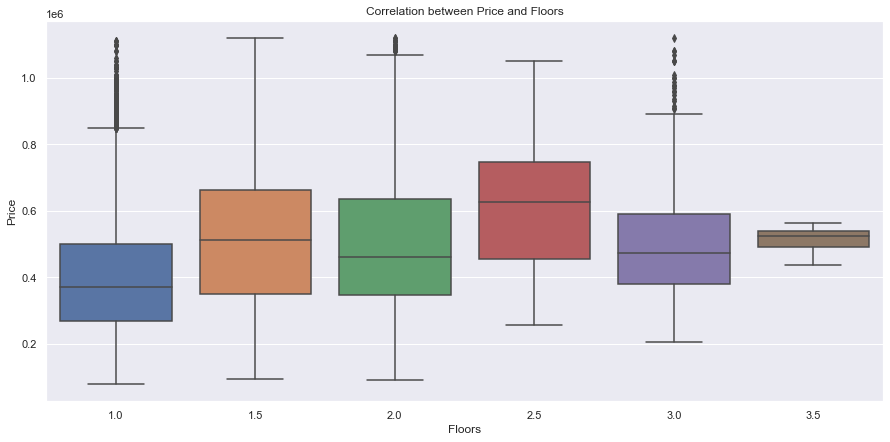

In [351]:
#Price vs Floors boxplot

f, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x="Floors", y="Price", data=sales)

plt.title("Correlation between Price and Floors")
plt.show()

In [358]:
#coast 2 sample t test
coast1 = sales[sales['Waterfront']==1]
coast1 = coast1['Price']

coast2 = sales[sales['Waterfront']==0]
coast2 = coast2['Price']

In [359]:
#From the univariate analysis, we know that there are more houses without sea view than with sea view.
#So we check to see if the variance of the larger group of data to the smaller group of data is larger than 4:1.
from statsmodels.stats.weightstats import ttest_ind
print(np.var(coast2)/np.var(coast1))

0.8255765709769107


In [360]:
# We can observe that 0.09 is lesser than 4, hence we can assume group has equal variance.
# Now we perform the t test to find p value.
stats.ttest_ind(a=coast1, b=coast2, equal_var=True)
#ttest_ind(coast1, coast2)

Ttest_indResult(statistic=7.231262469855019, pvalue=4.98892693332693e-13)

In [361]:
#furnished 2 sample t test
#coast 2 sample t test
furnished1 = sales[sales['Furnished']==1]
furnished1 = furnished1['Price']

furnished2 = sales[sales['Furnished']==0]
furnished2 = furnished2['Price']

In [362]:
print(np.var(furnished2)/np.var(furnished1))

0.8310701548609903


In [363]:
stats.ttest_ind(a=furnished1, b=furnished2, equal_var=True)

Ttest_indResult(statistic=62.25116363885364, pvalue=0.0)

In [364]:
sales.head(20)

,Date_sold,Month_sold,Day_sold,Year_sold,Years_since_txn,Price,Bedroom,Bathroom,Floors,Interior_space,Lot_size,Used_Area,Basement_area,Waterfront,Age,Furnished,Condition,Quality,Year_renovated,Zipcode
715,20140502,5,2,2014,8,335000,1,2,1.0,1350,2560,1350,0,0,46,0,3,8,0,98052
12679,20140502,5,2,2014,8,285000,2,2,1.0,2090,10834,1360,730,0,35,0,4,8,0,98003
14549,20140502,5,2,2014,8,407500,2,2,2.0,1930,10460,1930,0,0,26,0,3,8,0,98059
14703,20140502,5,2,2014,8,313000,2,1,1.5,1340,7912,1340,0,0,67,0,3,7,0,98133
14062,20140502,5,2,2014,8,790000,2,2,1.0,2600,4750,1700,900,0,71,1,4,9,0,98117
19257,20140502,5,2,2014,8,365000,2,1,1.0,1090,6435,1090,0,0,67,0,4,7,0,98106
15422,20140502,5,2,2014,8,335000,2,2,1.0,1580,16215,1580,0,0,44,0,4,7,0,98024
12509,20140502,5,2,2014,8,459990,2,2,2.0,2680,5539,2680,0,0,9,0,3,8,0,98045
11979,20140502,5,2,2014,8,275000,2,1,1.0,1180,10277,1180,0,0,39,0,3,6,0,98045
14134,20140502,5,2,2014,8,495000,2,2,1.0,1600,6380,1130,470,0,63,0,3,8,0,98125


In [365]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16989 entries, 715 to 651
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date_sold        16989 non-null  int32  
 1   Month_sold       16989 non-null  int32  
 2   Day_sold         16989 non-null  int32  
 3   Year_sold        16989 non-null  int32  
 4   Years_since_txn  16989 non-null  int32  
 5   Price            16989 non-null  int64  
 6   Bedroom          16989 non-null  int32  
 7   Bathroom         16989 non-null  int32  
 8   Floors           16989 non-null  float64
 9   Interior_space   16989 non-null  int32  
 10  Lot_size         16989 non-null  int32  
 11  Used_Area        16989 non-null  int32  
 12  Basement_area    16989 non-null  int32  
 13  Waterfront       16989 non-null  int32  
 14  Age              16989 non-null  int32  
 15  Furnished        16989 non-null  int32  
 16  Condition        16989 non-null  int32  
 17  Quality     

In [ ]:
#encode Bedrooms data

In [367]:
#dropping unnesecary columns
xyz = sales.copy()
xyz=xyz.drop(['Date_sold','Day_sold','Year_sold', 'Year_renovated'],axis=1)
#xyz=xyz.drop(['Latitude', 'Longitude'],axis=1)

In [368]:
#get dummies for categorical variables
xyz1 = pd.get_dummies(xyz, columns=['Bedroom', 'Bathroom', 'Floors', 'Waterfront', 'Condition', 'Quality', 'Furnished', 
                                        ],drop_first=True)


In [369]:
xyz1.head()

,Month_sold,Years_since_txn,Price,Interior_space,Lot_size,Used_Area,Basement_area,Age,Zipcode,Bedroom_2,Bedroom_3,Bathroom_2,Bathroom_3,Floors_1.5,Floors_2.0,Floors_2.5,Floors_3.0,Floors_3.5,Waterfront_1,Condition_2,Condition_3,Condition_4,Condition_5,Quality_4,Quality_5,Quality_6,Quality_7,Quality_8,Quality_9,Quality_10,Quality_11,Furnished_1
715,5,8,335000,1350,2560,1350,0,46,98052,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
12679,5,8,285000,2090,10834,1360,730,35,98003,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
14549,5,8,407500,1930,10460,1930,0,26,98059,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
14703,5,8,313000,1340,7912,1340,0,67,98133,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
14062,5,8,790000,2600,4750,1700,900,71,98117,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [370]:
X = xyz1.drop("Price" , axis=1)
y = xyz1["Price"]

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)

(11892, 31)
(5097, 31)


In [372]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

y_dtr_pred_train = dtr.predict(X_train)
y_dtr_pred_test = dtr.predict(X_test)

dtr_train_score=r2_score(y_train,y_dtr_pred_train)
dtr_test_score=r2_score(y_test,y_dtr_pred_test)

scores = pd.DataFrame({'Type':['Decision Tree Regressor'],'Test Score':[dtr_test_score], 'Train Score':[dtr_train_score]})

scores

,Type,Test Score,Train Score
0,Decision Tree Regressor,0.523398,1.0


model is overfitted, we will tune it

In [373]:
dtr = DecisionTreeRegressor(max_depth=15,min_samples_leaf=6)
dtr.fit(X_train, y_train)

y_dtr_pred_train = dtr.predict(X_train)
y_dtr_pred_test = dtr.predict(X_test)

dtr_train_score=r2_score(y_train,y_dtr_pred_train)
dtr_test_score=r2_score(y_test,y_dtr_pred_test)

temp = pd.DataFrame({'Type':['Decision Tree Regressor tuned'],'Test Score':[dtr_test_score], 'Train Score':[dtr_train_score]})
scores = pd.concat([scores, temp])

scores

,Type,Test Score,Train Score
0,Decision Tree Regressor,0.523398,1.000000
0,Decision Tree Regressor tuned,0.643627,0.848551


After tuning, overfitment has been addressed and model score has significantly improved

In [292]:
del scores

In [374]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [375]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_gbr_pred_train = gbr.predict(X_train)
y_gbr_pred_test = gbr.predict(X_test)

gbr_train_score=r2_score(y_train,y_gbr_pred_train)
gbr_test_score=r2_score(y_test,y_gbr_pred_test)

temp = pd.DataFrame({'Type':['Gradient Boosting Regressor'],'Test Score':[gbr_test_score], 'Train Score':[gbr_train_score]})
scores = pd.concat([scores, temp])

scores

,Type,Test Score,Train Score
0,Decision Tree Regressor,0.523398,1.000000
0,Decision Tree Regressor tuned,0.643627,0.848551
0,Gradient Boosting Regressor,0.725322,0.742878


we observe that this model performs well in training and testing. There is scope to further tune the model and improve the scores

In [376]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_rfr_pred_train = rfr.predict(X_train)
y_rfr_pred_test = rfr.predict(X_test)

rfr_train_score=r2_score(y_train,y_rfr_pred_train)
rfr_test_score=r2_score(y_test,y_rfr_pred_test)

temp = pd.DataFrame({'Type':['Random Forest Regressor'],'Test Score':[rfr_test_score], 'Train Score':[rfr_train_score]})
scores = pd.concat([scores, temp])

scores

,Type,Test Score,Train Score
0,Decision Tree Regressor,0.523398,1.000000
0,Decision Tree Regressor tuned,0.643627,0.848551
0,Gradient Boosting Regressor,0.725322,0.742878
0,Random Forest Regressor,0.758653,0.968372


model is overfitted

Gradiet Boosting Regressor gives the best performance in training and testing dataset. We will analyze the important features of it

First 15 features have 98% importance, can later use for hypertuning

In [379]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [381]:
param_grid = {
    'loss':['ls', 'huber', 'lad'],
    'max_depth': range(5, 15, 30),
    'max_features': ['auto','sqrt'],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_leaf': [5, 7, 10],
    'min_samples_split': [10, 100, 1000],
    'n_estimators': [50, 100, 200],
    'subsample':[0.6, 0.9]
}

In [382]:
gbr = GradientBoostingRegressor(random_state = 15)

In [383]:
param_grid_1 = {
    'learning_rate': [0.1,0.2],
    'min_samples_leaf': [4,10],
    'min_samples_split': [10,1000],
    'n_estimators': [10,100],
    'subsample':[0.8,1]
}

In [384]:
grid_search_1 = GridSearchCV(estimator = gbr, param_grid = param_grid_1, cv = 3, n_jobs = -1, verbose = 1)

grid_search_1.fit(X_train,y_train)
grid_search_1.best_params_, grid_search_1.best_score_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'learning_rate': 0.2,
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 100,
  'subsample': 1},
 0.7959536780777476)

In [385]:
param_grid_1 = {
    'learning_rate': [0.2, 0.4],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5, 10],
    'n_estimators': [100, 300],
    'subsample':[0.8]
}

In [386]:
grid_search_1 = GridSearchCV(estimator = gbr, param_grid = param_grid_1, cv = 3, n_jobs = -1, verbose = 1)

grid_search_1.fit(X_train,y_train)
grid_search_1.best_params_, grid_search_1.best_score_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


({'learning_rate': 0.2,
  'min_samples_leaf': 3,
  'min_samples_split': 5,
  'n_estimators': 300,
  'subsample': 0.8},
 0.8279463281570241)

In [387]:
param_grid_1 = {
    'learning_rate': [0.15, 0.2],
    'min_samples_leaf': [4, 6],
    'min_samples_split': [10, 15],
    'n_estimators': [300, 500],
    'subsample':[0.8]
}

In [388]:
grid_search_1 = GridSearchCV(estimator = gbr, param_grid = param_grid_1, cv = 3, n_jobs = -1, verbose = 1)

grid_search_1.fit(X_train,y_train)
grid_search_1.best_params_, grid_search_1.best_score_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


({'learning_rate': 0.15,
  'min_samples_leaf': 4,
  'min_samples_split': 15,
  'n_estimators': 500,
  'subsample': 0.8},
 0.8319708459845798)

In [389]:
param_grid_1 = {
    'learning_rate': [0.13, 0.15],
    'min_samples_leaf': [6],
    'min_samples_split': [10, 12],
    'n_estimators': [500, 700],
    'subsample':[0.8]
}

In [390]:
grid_search_1 = GridSearchCV(estimator = gbr, param_grid = param_grid_1, cv = 3, n_jobs = -1, verbose = 1)

grid_search_1.fit(X_train,y_train)
grid_search_1.best_params_, grid_search_1.best_score_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'learning_rate': 0.13,
  'min_samples_leaf': 6,
  'min_samples_split': 10,
  'n_estimators': 700,
  'subsample': 0.8},
 0.8328086380079296)

In [391]:
param_grid_1 = {
    'learning_rate': [0.12, 0.13],
    'min_samples_leaf': [6],
    'min_samples_split': [10],
    'n_estimators': [700, 900],
    'subsample':[0.8]
}

In [392]:
grid_search_1 = GridSearchCV(estimator = gbr, param_grid = param_grid_1, cv = 3, n_jobs = -1, verbose = 1)

grid_search_1.fit(X_train,y_train)
grid_search_1.best_params_, grid_search_1.best_score_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


({'learning_rate': 0.13,
  'min_samples_leaf': 6,
  'min_samples_split': 10,
  'n_estimators': 900,
  'subsample': 0.8},
 0.8329620319225266)

In [393]:
param_grid_1 = {
    'loss':['ls', 'huber', 'lad'],
    'max_depth': range(5, 15, 30),
    'max_features': ['auto','sqrt'],
    'learning_rate': [0.13],
    'min_samples_leaf': [6],
    'min_samples_split': [10],
    'n_estimators': [700],
    'subsample':[0.8]
}

In [394]:
grid_search_1 = GridSearchCV(estimator = gbr, param_grid = param_grid_1, cv = 3, n_jobs = -1, verbose = 1)

grid_search_1.fit(X_train,y_train)
grid_search_1.best_params_, grid_search_1.best_score_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


({'learning_rate': 0.13,
  'loss': 'huber',
  'max_depth': 5,
  'max_features': 'auto',
  'min_samples_leaf': 6,
  'min_samples_split': 10,
  'n_estimators': 700,
  'subsample': 0.8},
 0.8272563415632329)

In [395]:
gbr = GradientBoostingRegressor(
    random_state = 15,
    learning_rate = 0.13,
    loss = 'huber',
    max_depth = 5,
    max_features = 'auto',
    min_samples_leaf = 20,
    min_samples_split = 40,
    n_estimators = 500,
    subsample = 0.8
    )

gbr.fit(X_train, y_train)

y_gbr_pred_train = gbr.predict(X_train)
y_gbr_pred_test = gbr.predict(X_test)

gbr_train_score=r2_score(y_train,y_gbr_pred_train)
gbr_test_score=r2_score(y_test,y_gbr_pred_test)

temp = pd.DataFrame({'Type':['Gradient Boosting Regressor tuned'],'Test Score':[gbr_test_score], 'Train Score':[gbr_train_score]})
scores = pd.concat([scores, temp])

scores

,Type,Test Score,Train Score
0,Decision Tree Regressor,0.523398,1.000000
0,Decision Tree Regressor tuned,0.643627,0.848551
0,Gradient Boosting Regressor,0.725322,0.742878
0,Random Forest Regressor,0.758653,0.968372
0,Gradient Boosting Regressor tuned,0.836793,0.915415


First 10 feature importance:	 Imp    96.565
dtype: float64


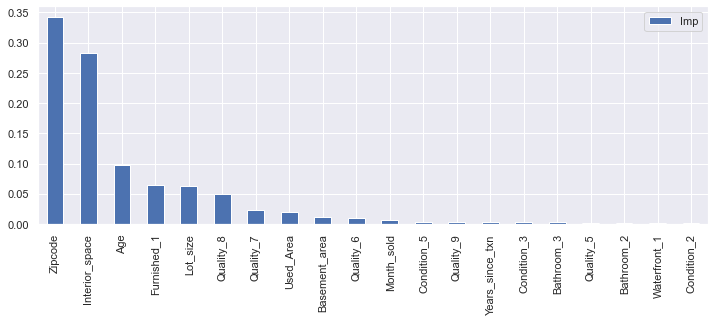

In [396]:
#feature importance
gbr_feature_imp = pd.DataFrame(gbr.feature_importances_, columns = ["Imp"], index = X_test.columns)
gbr_feature_imp.sort_values(by="Imp",ascending=False)

gbr_feature_imp['Imp'] = gbr_feature_imp['Imp'].map('{0:.5f}'.format)
gbr_feature_imp = gbr_feature_imp.sort_values(by="Imp",ascending=False)

gbr_feature_imp.Imp = gbr_feature_imp.Imp.astype("float")

gbr_feature_imp[:20].plot.bar(figsize=(12, 4))
print("First 10 feature importance:\t",(gbr_feature_imp[:10].sum())*100)